In [2]:
import os
os.chdir('projects_on_GitHub/udacity_project/DataWrangling_TwitterData')

- Tweets favorited by most users?
- Common dog names
- What are the most common breeds found by the neural network?
- Most popular dog, stage.. ratings distribution, least rating

In [16]:
master_df = pd.read_csv('master.csv')

In [17]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,ratings,dog_stage,names,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,1.3,NaN,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,1.3,NaN,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,1.2,NaN,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,1.3,NaN,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,1.2,NaN,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [18]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1883 non-null   int64  
 1   timestamp           1883 non-null   object 
 2   source              1883 non-null   object 
 3   text                1883 non-null   object 
 4   expanded_urls       1883 non-null   object 
 5   rating_numerator    1883 non-null   float64
 6   rating_denominator  1883 non-null   float64
 7   ratings             1883 non-null   float64
 8   dog_stage           289 non-null    object 
 9   names               1249 non-null   object 
 10  retweet_count       1883 non-null   int64  
 11  favorite_count      1883 non-null   int64  
 12  jpg_url             1883 non-null   object 
 13  img_num             1883 non-null   int64  
 14  p1                  1883 non-null   object 
 15  p1_conf             1883 non-null   float64
 16  p1_dog

In [21]:
master_df.favorite_count.sort_values(ascending=False)[:10]

685     150454
264     128611
347     116170
97      112689
718     111252
57       96081
119      83514
84       76444
1321     76341
350      73393
Name: favorite_count, dtype: int64

In [22]:
master_df.retweet_count.sort_values(ascending=False)[:10]

685     74276
718     55350
347     54159
264     41872
57      39014
350     33886
97      31608
1321    30035
1379    29071
555     28063
Name: retweet_count, dtype: int64

In [23]:
master_df.names.value_counts()

Lucy       9
Oliver     9
Cooper     9
Penny      8
Winston    8
          ..
Marty      1
Sephie     1
Dallas     1
Zooey      1
Jareld     1
Name: names, Length: 880, dtype: int64

In [25]:
master_df.dog_stage.value_counts()

pupper            198
doggo              53
puppo              20
doggo, pupper      10
floofer             7
doggo, floofer      1
Name: dog_stage, dtype: int64

In [36]:
master_df[master_df.p1_conf == master_df[master_df.p1_dog==True].p1_conf.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,ratings,dog_stage,names,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1735,668636665813057536,2015-11-23 03:46:18,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,https://twitter.com/dog_rates/status/668636665...,10.0,10.0,1.0,NaN,Berta.,...,1,komondor,0.999956,True,llama,0.000043,False,ram,2.160900e-07,False


(array([1.881e+03, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.  ,  17.76,  35.52,  53.28,  71.04,  88.8 , 106.56, 124.32,
        142.08, 159.84, 177.6 ]),
 <BarContainer object of 10 artists>)

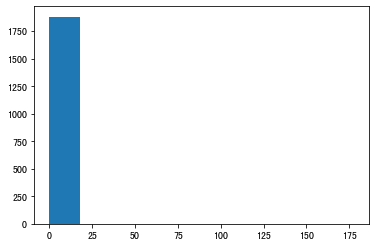

In [38]:
plt.hist(master_df.ratings)

In [46]:
master_df.ratings.value_counts()

1.000000      413
1.200000      408
1.100000      384
1.300000      230
0.900000      149
0.800000       94
0.700000       51
0.500000       34
0.600000       32
1.400000       30
0.300000       19
0.400000       15
0.200000       10
0.100000        3
1.127000        1
1.350000        1
3.428571        1
0.636364        1
0.818182        1
1.126000        1
0.975000        1
42.000000       1
177.600000      1
0.000000        1
1.500000        1
Name: ratings, dtype: int64

(array([  4.,  10.,  19.,  15.,  34.,  33.,  51.,  95., 150., 413., 794.,
        230.,  31.,   1.,   0.,   0.,   0.,   0.]),
 array([0.  , 0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77, 0.88, 0.99, 1.1 ,
        1.21, 1.32, 1.43, 1.54, 1.65, 1.76, 1.87, 1.98]),
 <BarContainer object of 18 artists>)

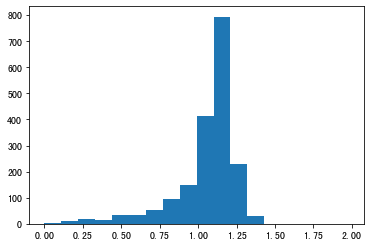

In [65]:
bins = np.arange(master_df.ratings.min(), 2, 0.11)
plt.hist(master_df.ratings, bins=bins)

In [49]:
master_df.ratings.describe()

count    1883.000000
mean        1.163973
std         4.182224
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: ratings, dtype: float64